In [1]:
# ret_apr = (((116557.57 + (5929.68 -5839.47)))/115521.49) /100    
# # axis show 0 and 100k more labels for y axis 
# # mre explicit, this is july 2022 till 
# # df.tail(5)
# # emphasis 9n the start of the investment , and also end of each month 

In [1]:
%run _22_tbls.py


 ATTN !! _22_ LEDGER EXPORTED _df_costs_1_2_complete_LEDGER.pkl


BROCKAGE COSTS till 2022-07-01 are $ 606



Type 'cd' for today's date or 'pd' for the past adjusted date or the last day of the month:  pd
Enter the number of months ago:  1


Selected cutoff date: 2024-04-30
2024-04-30 00:00:00
2024-04-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-03-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-02-29
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-01-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-12-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-11-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-10-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-09-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-08-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-07-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-06-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-05-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-04-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-03-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-02-28
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-01-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2022-12-30
- - - - - - - - - - - - - > LEDGER PROCE

In [3]:
# RESET
#df_1cp = df1r

In [2]:
df_report = pd.read_pickle(f'_1_tables/_df_report_3_ret_div_cash_.pkl')

In [4]:
# last df_report
df_report
df = df_report.merge(df_br_costs, on='period', how='left').copy()
#df.head()

brokerage_paid = df['trans_fee'].sum()
initial_investment= 100000 
d_start_date= '2022-07-01'
cash_init = 1852.200000
# Monthly returns table 
df = df.drop_duplicates(subset=['period'], keep='first')
df = df[['AnalysisEndDate','period',
       'period_divs','period_total_cash',
       'period_stocks_value','period_total_holds'
      ]]

per_inv = len(df)
new_row = {
    "AnalysisEndDate": d_start_date,
    "period": per_inv,  # Assigning -1 to denote initial state before period 0

    "period_divs": 0,
    "period_total_cash": cash_init+0,
    "period_stocks_value": initial_investment-cash_init,
    "period_total_holds": initial_investment
}

# Appending the new row
df = df.append(new_row, ignore_index=True)
df.sort_values(by='period', ascending=True, inplace=True)
# Calculate monthly returns
df = df.merge(df_br_costs, on='period', how='left').copy()
# ACCOUNT NOW FOR TRANS FEES.

df['cash_shifted_last'] = df['period_total_cash'].shift(-1)
df['stock_shifted_last'] = df['period_stocks_value'].shift(-1)

df_1cp = df.copy()


In [5]:
all_trans_fee = df_1cp['trans_fee'].sum()

In [6]:
# RESET
df1r = df_1cp.copy()
df_1cp = df1r.copy()

In [7]:
# Calculate the change in CASH FLOW values between the current period and the next period

df_1cp['period_DIFF_cash'] = df_1cp['period_total_cash']-df_1cp['cash_shifted_last']
# Calculate the change in stock values between the current period and the next period
df_1cp['period_DIFF_stock'] = df_1cp['period_stocks_value'] - df_1cp['stock_shifted_last']


In [8]:
df_1cp['return_percentage'] = ((df_1cp['period_stocks_value'] - df_1cp['stock_shifted_last'] + df_1cp['period_DIFF_cash']) / df_1cp['stock_shifted_last']) * 100


In [9]:

(116047.03/117948.11) + (122/117948.11) -1

-0.015083582093854742

In [10]:
df_1cp['total_return'] = ((df_1cp['period_total_holds']/initial_investment)-1)*100

In [11]:
df_1cp#.head()

,AnalysisEndDate,period,period_divs,period_total_cash,period_stocks_value,period_total_holds,trans_fee,cash_shifted_last,stock_shifted_last,period_DIFF_cash,period_DIFF_stock,return_percentage,total_return
0,2024-04-30,0,5873.99,6359.88,116047.03,122406.90,0,6237.63,117948.11,122.25,-1901.08,-1.508146,22.40690
1,2024-03-30,1,5751.75,6237.63,117948.11,124185.74,0,5999.06,113942.85,238.57,4005.26,3.724525,24.18574
2,2024-02-29,2,5513.18,5999.06,113942.85,119941.92,0,8237.60,107876.50,-2238.54,6066.35,3.548326,19.94192
3,2024-01-30,3,5269.38,8237.60,107876.50,116114.10,99,7929.31,108139.60,308.29,-263.10,0.041789,16.11410
4,2023-12-30,4,4961.09,7929.31,108139.60,116068.91,13,7711.41,104047.28,217.90,4092.32,4.142559,16.06891
5,2023-11-30,5,4743.18,7711.41,104047.28,111758.69,0,7374.02,99160.45,337.39,4886.83,5.268451,11.75869
6,2023-10-30,6,4405.79,7374.02,99160.45,106534.47,0,6130.56,104409.85,1243.46,-5249.40,-3.836745,6.53447
7,2023-09-30,7,4278.36,6130.56,104409.85,110540.40,26,5850.11,108030.65,280.45,-3620.80,-3.092039,10.54040
8,2023-08-30,8,3997.91,5850.11,108030.65,113880.76,39,5629.60,109030.92,220.51,-1000.27,-0.715173,13.88076
9,2023-07-30,9,3777.40,5629.60,109030.92,114660.52,0,4819.54,108060.14,810.06,970.78,1.648008,14.66052


In [12]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')


end_date = df_1cp.iloc[0]['AnalysisEndDate']
m_ret = df_1cp.iloc[0]['return_percentage']
#print(f'{end_date}')
message_mr = f"""The total monthly percentage return of the fund including 
monthly dividends to end date of {end_date.strftime('%d %B %Y')}, was: {m_ret:.2f}%
"""
print(message_mr)

The total monthly percentage return of the fund including 
monthly dividends to end date of 30 April 2024, was: -1.51%



In [13]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
#df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')


total_return = df_1cp.iloc[0]['total_return'] # here is logical that you use the last full amount 

message_tr = f"""The total return of the fund including dividends and,
cash flow since Inception the end date of {end_date.strftime('%d %B %Y')}, was:  {total_return:.2f}%
"""
print(message_tr)

The total return of the fund including dividends and,
cash flow since Inception the end date of 30 April 2024, was:  22.41%



In [14]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# Get the return percentage from the first recordable calculation
total_return_stocks = df_1cp.iloc[0]['period_stocks_value']  # This picks the latest month's return
# Create the message
message_psr = f"""The total Stock Holding Value at the end date of {end_date.strftime('%d %B %Y')}, was: {total_return_stocks:.2f} $
"""
print(message_psr)


The total Stock Holding Value at the end date of 30 April 2024, was: 116047.03 $



In [15]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# divs
total_return_divs = df_1cp.iloc[0]['period_divs']

# Create the message
message_pca = f"""
The total Dividends amount from {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')}, was: {total_return_divs:.2f} $
"""
print(message_pca)




The total Dividends amount from 01 July 2022 to 30 April 2024, was: 5873.99 $



In [16]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# divs
total_return_divs = (df_1cp.iloc[0]['period_divs'] - df.iloc[1]['period_divs'])/df.iloc[1]['period_divs']

# Create the message
message_psd = f"""The total monthly Dividends yield from  {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')}, was: {total_return_divs:.2f} $
"""
print(message_psd)



The total monthly Dividends yield from  30 March 2024 to 30 April 2024, was: 0.02 $



In [17]:

# current cash excess amount 

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']

# Since start_date and end_date are already datetime objects, you can directly use them
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day

# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# Get the return percentage from the first recordable calculation
total_return =  df_1cp.iloc[0]['period_total_cash']  # This picks the latest month's return

In [18]:
message_pcb = f'The current cash in this portfolio including dividends is {total_return}'

In [19]:
# YEARLY yield and that it 


# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']

# Since start_date and end_date are already datetime objects, you can directly use them
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day

# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')
# Get the first and last date from the DataFrame


final_value = total_return_stocks
dividends_received = total_return_divs

total_adjusted_final = final_value - initial_investment + dividends_received - all_trans_fee
time_difference = (end_date - start_date).days / 365.25  # Use 365.25 to account for leap years

CAGR = ((final_value + dividends_received - all_trans_fee) / initial_investment) ** (1 / time_difference) - 1
CAGR_percentage = CAGR * 100

message_cagr =f"""
The Compound Annual Growth Rate (CAGR) for the portfolio
from {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')} is approximately {CAGR_percentage:.2f}% per annum
"""

print(message_cagr)


The Compound Annual Growth Rate (CAGR) for the portfolio
from 01 July 2022 to 30 April 2024 is approximately 8.15% per annum



In [20]:

######################################################
###############################################################
report_p1 = f"""
*********************************************************************

Assuming Balance Growth, we have the following:

Portfolio Initial investment is: ${initial_investment} 
Approximately, we have blockage costs of: ${all_trans_fee}

{message_mr}
{message_tr}
{message_psr}
 -{message_psd}
 -{message_pcb}
{message_pca}
{message_cagr}
*********************************************************************
"""
def report_p1_fn(report_p1):
    print(report_p1)
    return report_p1


In [21]:
print(report_p1)


*********************************************************************

Assuming Balance Growth, we have the following:

Portfolio Initial investment is: $100000 
Approximately, we have blockage costs of: $606

The total monthly percentage return of the fund including 
monthly dividends to end date of 30 April 2024, was: -1.51%

The total return of the fund including dividends and,
cash flow since Inception the end date of 30 April 2024, was:  22.41%

The total Stock Holding Value at the end date of 30 April 2024, was: 116047.03 $

 -The total monthly Dividends yield from  30 March 2024 to 30 April 2024, was: 0.02 $

 -The current cash in this portfolio including dividends is 6359.88

The total Dividends amount from 01 July 2022 to 30 April 2024, was: 5873.99 $


The Compound Annual Growth Rate (CAGR) for the portfolio
from 01 July 2022 to 30 April 2024 is approximately 8.15% per annum

*********************************************************************



In [85]:
df[['AnalysisEndDate','period_total_holds','period']]

,AnalysisEndDate,period_total_holds,period
0,2024-04-30,122406.90,0
1,2024-03-30,124185.74,1
2,2024-02-29,119941.92,2
3,2024-01-30,116114.10,3
4,2023-12-30,116068.91,4
5,2023-11-30,111758.69,5
6,2023-10-30,106534.47,6
7,2023-09-30,110540.40,7
8,2023-08-30,113880.76,8
9,2023-07-30,114660.52,9


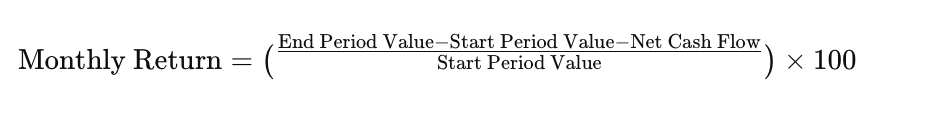

In [23]:
((116047.03 - (117948.11 +122))/117948.11)*100

-1.715228840886049

In [24]:
# # Example values
# end_period_value_april = 116047.03 # Assumed end of April period_stocks_value
# trans_fee_april = 0  # Assumed transaction fee for April
# diff_cash_montly_april = 238  # Assumed difference in cash for April

# start_period_value_march = 117948.11  # From your data
# net_cash_flow_april = diff_cash_montly_april - trans_fee_april

# # Monthly return calculation
# monthly_return_april = ((end_period_value_april - start_period_value_march - net_cash_flow_april) / start_period_value_march) * 100
# monthly_return_april


In [25]:
df_1cp

,AnalysisEndDate,period,period_divs,period_total_cash,period_stocks_value,period_total_holds,trans_fee,cash_shifted_last,stock_shifted_last,period_DIFF_cash,period_DIFF_stock,return_percentage,total_return
0,2024-04-30,0,5873.99,6359.88,116047.03,122406.90,0,6237.63,117948.11,122.25,-1901.08,-1.508146,22.40690
1,2024-03-30,1,5751.75,6237.63,117948.11,124185.74,0,5999.06,113942.85,238.57,4005.26,3.724525,24.18574
2,2024-02-29,2,5513.18,5999.06,113942.85,119941.92,0,8237.60,107876.50,-2238.54,6066.35,3.548326,19.94192
3,2024-01-30,3,5269.38,8237.60,107876.50,116114.10,99,7929.31,108139.60,308.29,-263.10,0.041789,16.11410
4,2023-12-30,4,4961.09,7929.31,108139.60,116068.91,13,7711.41,104047.28,217.90,4092.32,4.142559,16.06891
5,2023-11-30,5,4743.18,7711.41,104047.28,111758.69,0,7374.02,99160.45,337.39,4886.83,5.268451,11.75869
6,2023-10-30,6,4405.79,7374.02,99160.45,106534.47,0,6130.56,104409.85,1243.46,-5249.40,-3.836745,6.53447
7,2023-09-30,7,4278.36,6130.56,104409.85,110540.40,26,5850.11,108030.65,280.45,-3620.80,-3.092039,10.54040
8,2023-08-30,8,3997.91,5850.11,108030.65,113880.76,39,5629.60,109030.92,220.51,-1000.27,-0.715173,13.88076
9,2023-07-30,9,3777.40,5629.60,109030.92,114660.52,0,4819.54,108060.14,810.06,970.78,1.648008,14.66052


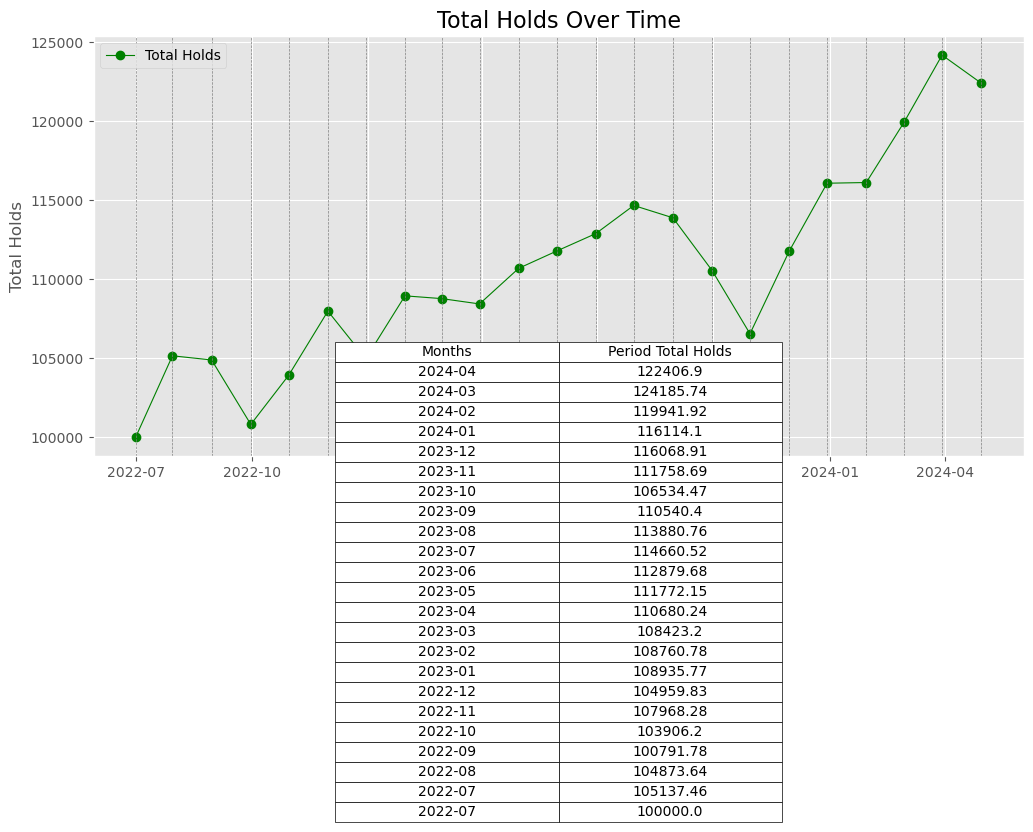

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
# df_1cp should have columns: 'AnalysisEndDate', 'period_total_holds'

# Ensure 'AnalysisEndDate' is a datetime type for proper plotting
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Plotting
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds', color='green', marker='o', linewidth=0.8)
ax1.set_title('Total Holds Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend()

# Adding monthly vertical lines
dates = df_1cp['AnalysisEndDate']
for date in dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

# Creating the performance data DataFrame
performance_data = {
    'Months': dates.dt.strftime('%Y-%m'),  # Corrected use of strftime
    'Period Total Holds': df_1cp['period_total_holds'].tolist()  # Extracting data from the 'period_total_holds' column
}

performance_df = pd.DataFrame(performance_data)

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, cellLoc='center', loc='center', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Increase the height of the rows and decrease the width of the columns for a more professional look

# Display the plot
plt.show()


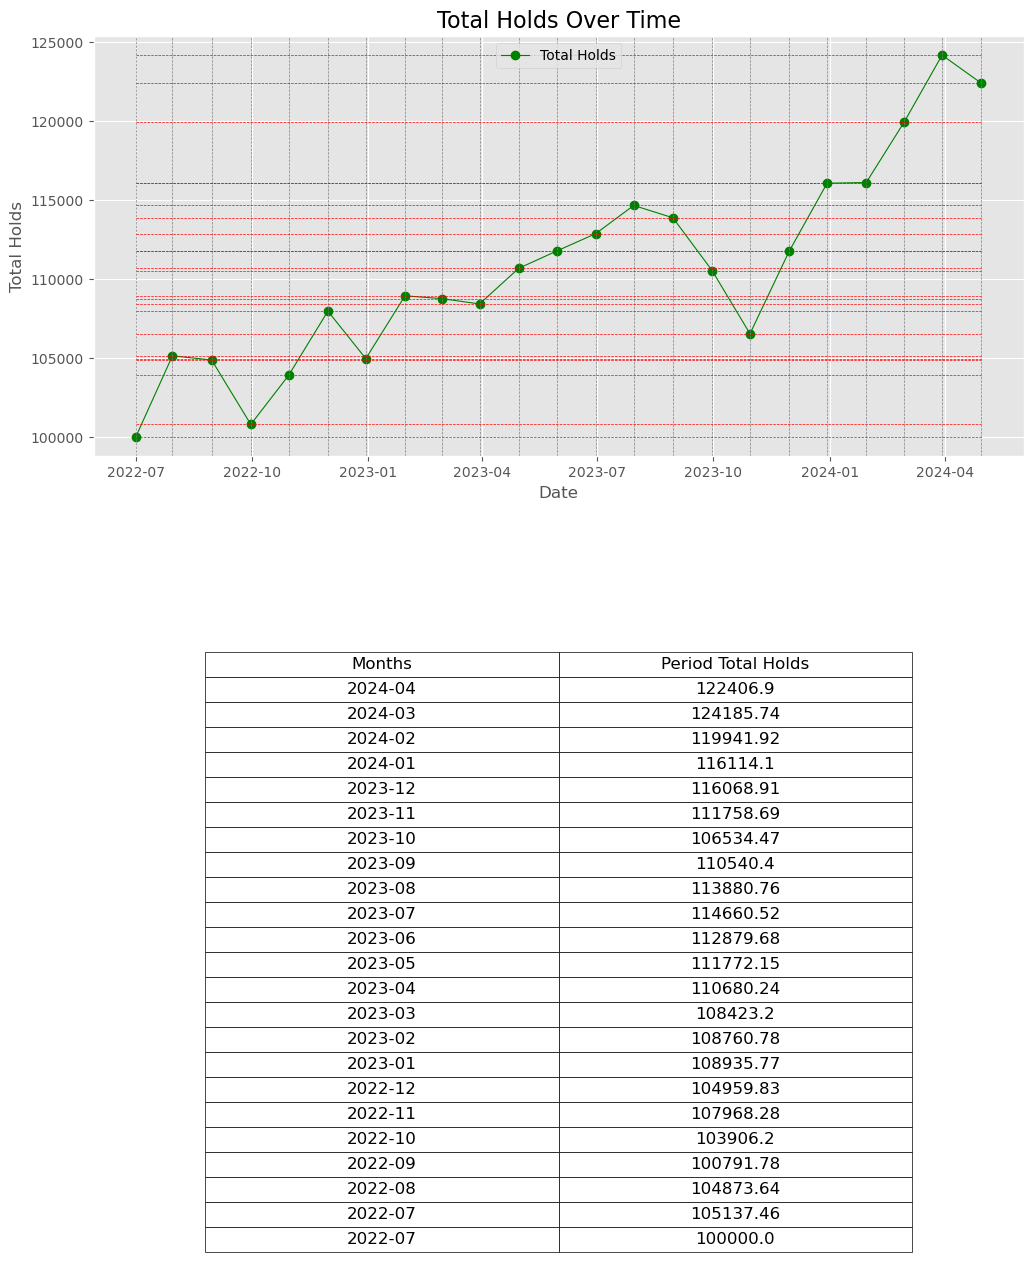

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
# df_1cp should have columns: 'AnalysisEndDate', 'period_total_holds'

# Ensure 'AnalysisEndDate' is a datetime type for proper plotting
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Plotting
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds', color='green', marker='o', linewidth=0.8)
ax1.set_title('Total Holds Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend()

# Adding monthly vertical lines
dates = df_1cp['AnalysisEndDate']
for date in dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

# Adding horizontal red lines to the y-axis
y_values = df_1cp['period_total_holds']
for y in y_values:
    ax1.plot([df_1cp['AnalysisEndDate'].min(), df_1cp['AnalysisEndDate'].max()], [y, y], color='red', linestyle='--', linewidth=0.5)

# Creating the performance data DataFrame
performance_data = {
    'Months': dates.dt.strftime('%Y-%m'),  # Corrected use of strftime
    'Period Total Holds': df_1cp['period_total_holds'].tolist()  # Extracting data from the 'period_total_holds' column
}

performance_df = pd.DataFrame(performance_data)

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, cellLoc='center', loc='bottom', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.9, 1.5)  # Increase the height of the rows and decrease the width of the columns for a more professional look

# Display the plot
plt.show()


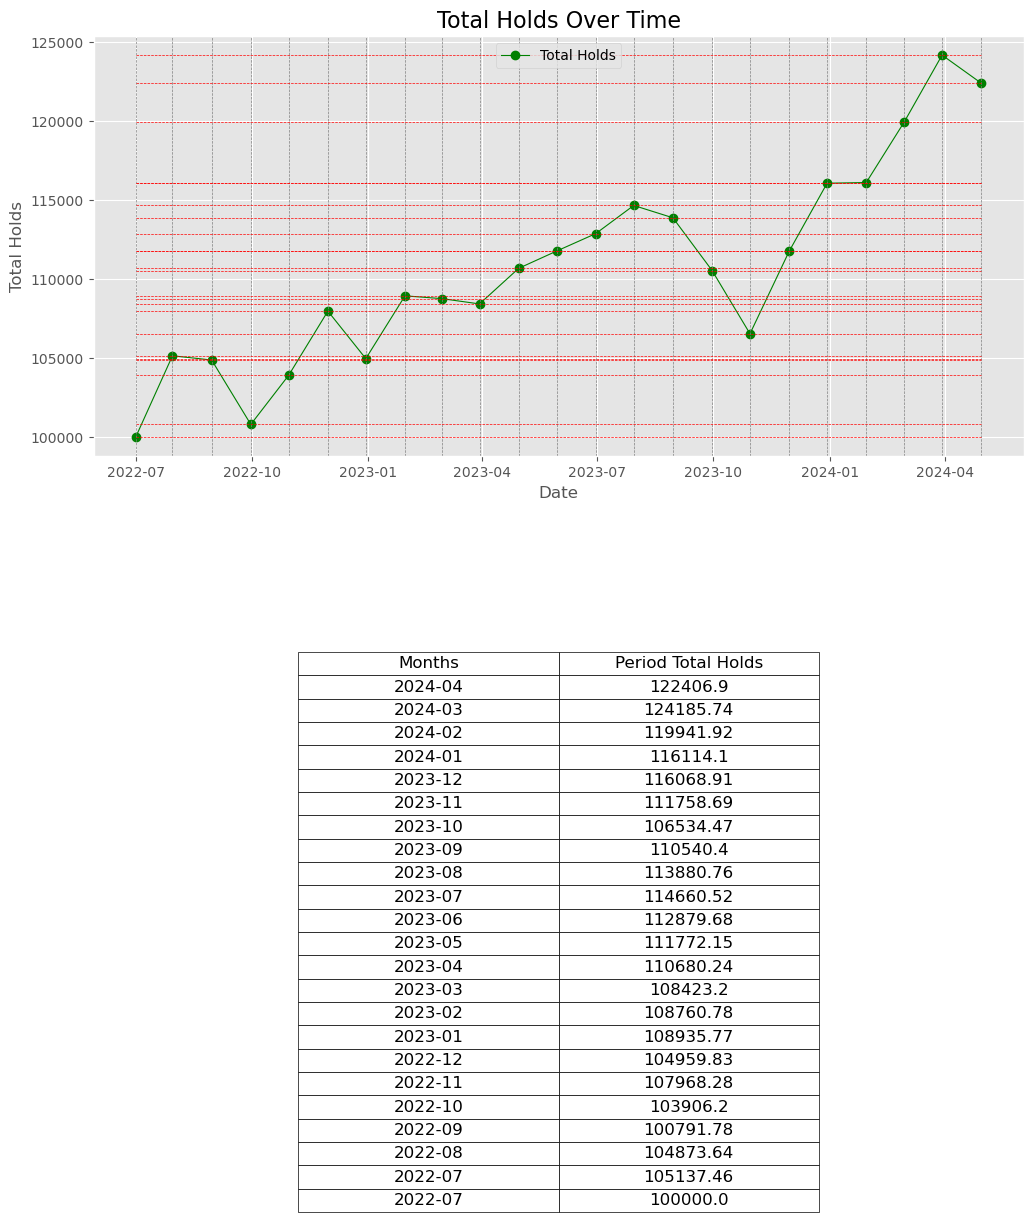

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
# df_1cp should have columns: 'AnalysisEndDate', 'period_total_holds'

# Ensure 'AnalysisEndDate' is a datetime type for proper plotting
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Plotting
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds', color='green', marker='o', linewidth=0.8)
ax1.set_title('Total Holds Over Time', fontsize=16)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend()

# Adding monthly vertical lines
dates = df_1cp['AnalysisEndDate']
for date in dates:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

# Adding horizontal red lines to the y-axis
y_values = df_1cp['period_total_holds']
for y in y_values:
    ax1.plot([df_1cp['AnalysisEndDate'].min(), df_1cp['AnalysisEndDate'].max()], [y, y], color='red', linestyle='--', linewidth=0.5)

# Creating the performance data DataFrame
performance_data = {
    'Months': dates.dt.strftime('%Y-%m'),  # Corrected use of strftime
    'Period Total Holds': df_1cp['period_total_holds'].tolist()  # Extracting data from the 'period_total_holds' column
}

performance_df = pd.DataFrame(performance_data)

ax2 = fig.add_subplot(gs[1])
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, cellLoc='center', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.4, 1.4)  # Increase the height of the rows and decrease the width of the columns for a more professional look

# Adjust the bottom parameter to move the table up or down
table_props = table.properties()
table_props['bottom'] = 0.2  # Adjust this value to move the table up or down

# Display the plot
plt.show()


/var/folders/r1/gtmyxpws2836627xn7_9c5380000gn/T/ipykernel_2375/2747609254.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # This may help adjust the position and layout automatically


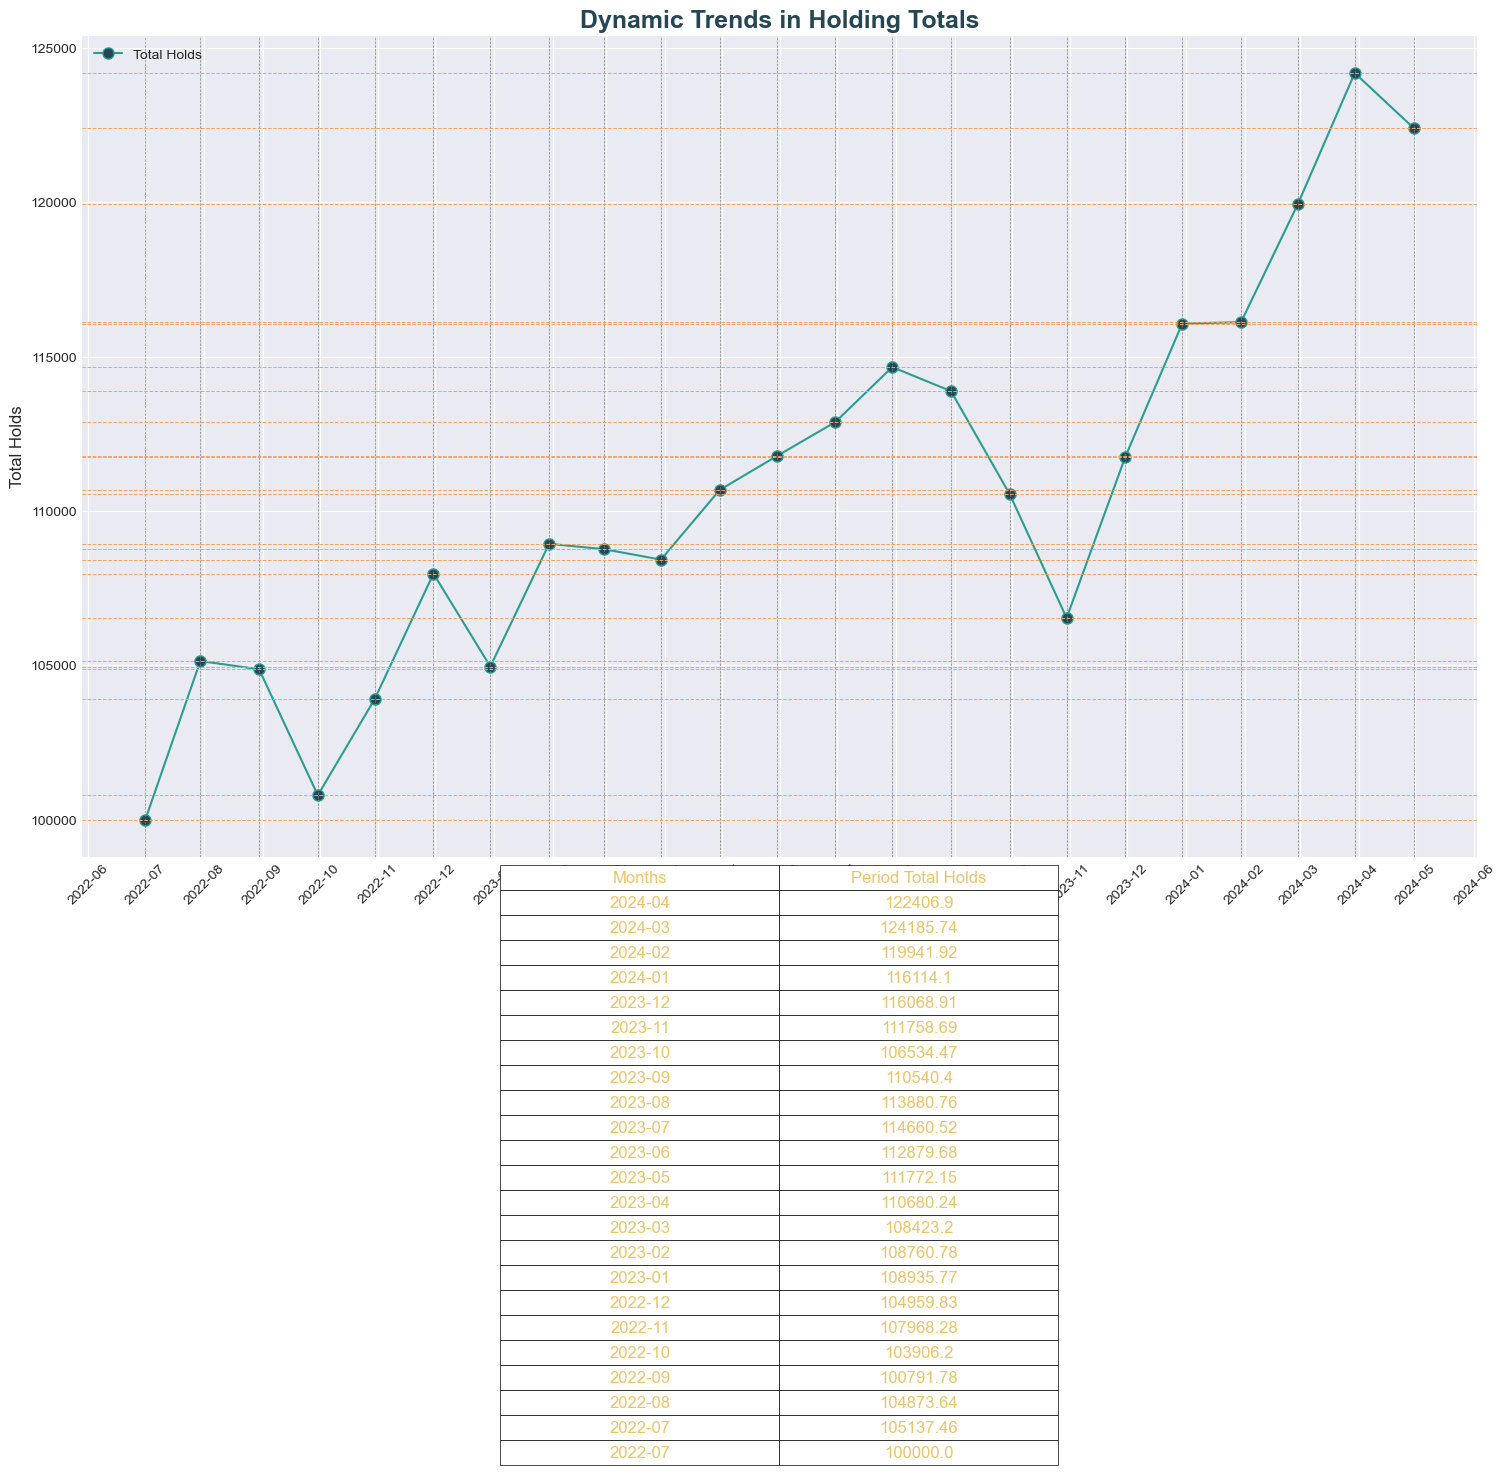

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jim/Jim_outputs/holding_totals_plot.png'

<Figure size 640x480 with 0 Axes>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Define a professional color palette
line_color = '#2a9d8f'  # Teal
marker_color = '#264653'  # Dark blue-grey
table_font_color = '#e9c46a'  # Saffron
horizontal_line_color = '#f4a261'  # Sandy brown, more visible

# Use a professional style
plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.4)

# Plot line graph
ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds',
         color=line_color, marker='o', markerfacecolor=marker_color, markersize=8, linewidth=1.5)
ax1.set_title('Dynamic Trends in Holding Totals', fontsize=18, fontweight='bold', color=marker_color)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend(loc='upper left')

# Formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)  # Rotate date labels for clarity

# Adding customizable horizontal and vertical lines
for date in df_1cp['AnalysisEndDate']:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

for y in np.unique(df_1cp['period_total_holds']):
    ax1.axhline(y=y, color=horizontal_line_color, linestyle='--', linewidth=0.7)  # Thicker and more visible

# Create performance data DataFrame
performance_data = {
    'Months': df_1cp['AnalysisEndDate'].dt.strftime('%Y-%m'),
    'Period Total Holds': df_1cp['period_total_holds'].tolist()
}
performance_df = pd.DataFrame(performance_data)

# Plot table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Modify scale as needed

# Set text properties for color
text_props = table.get_celld()
for cell in text_props:
    text_props[cell].get_text().set_color(table_font_color)

plt.tight_layout()  # This may help adjust the position and layout automatically
plt.show()
output_dir = "/Users/jim/Jim_outputs/"
plt.savefig(f"{output_dir}holding_totals_plot.png", format='png', dpi=300) 

/var/folders/r1/gtmyxpws2836627xn7_9c5380000gn/T/ipykernel_2375/555820451.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust the layout to make space for all elements


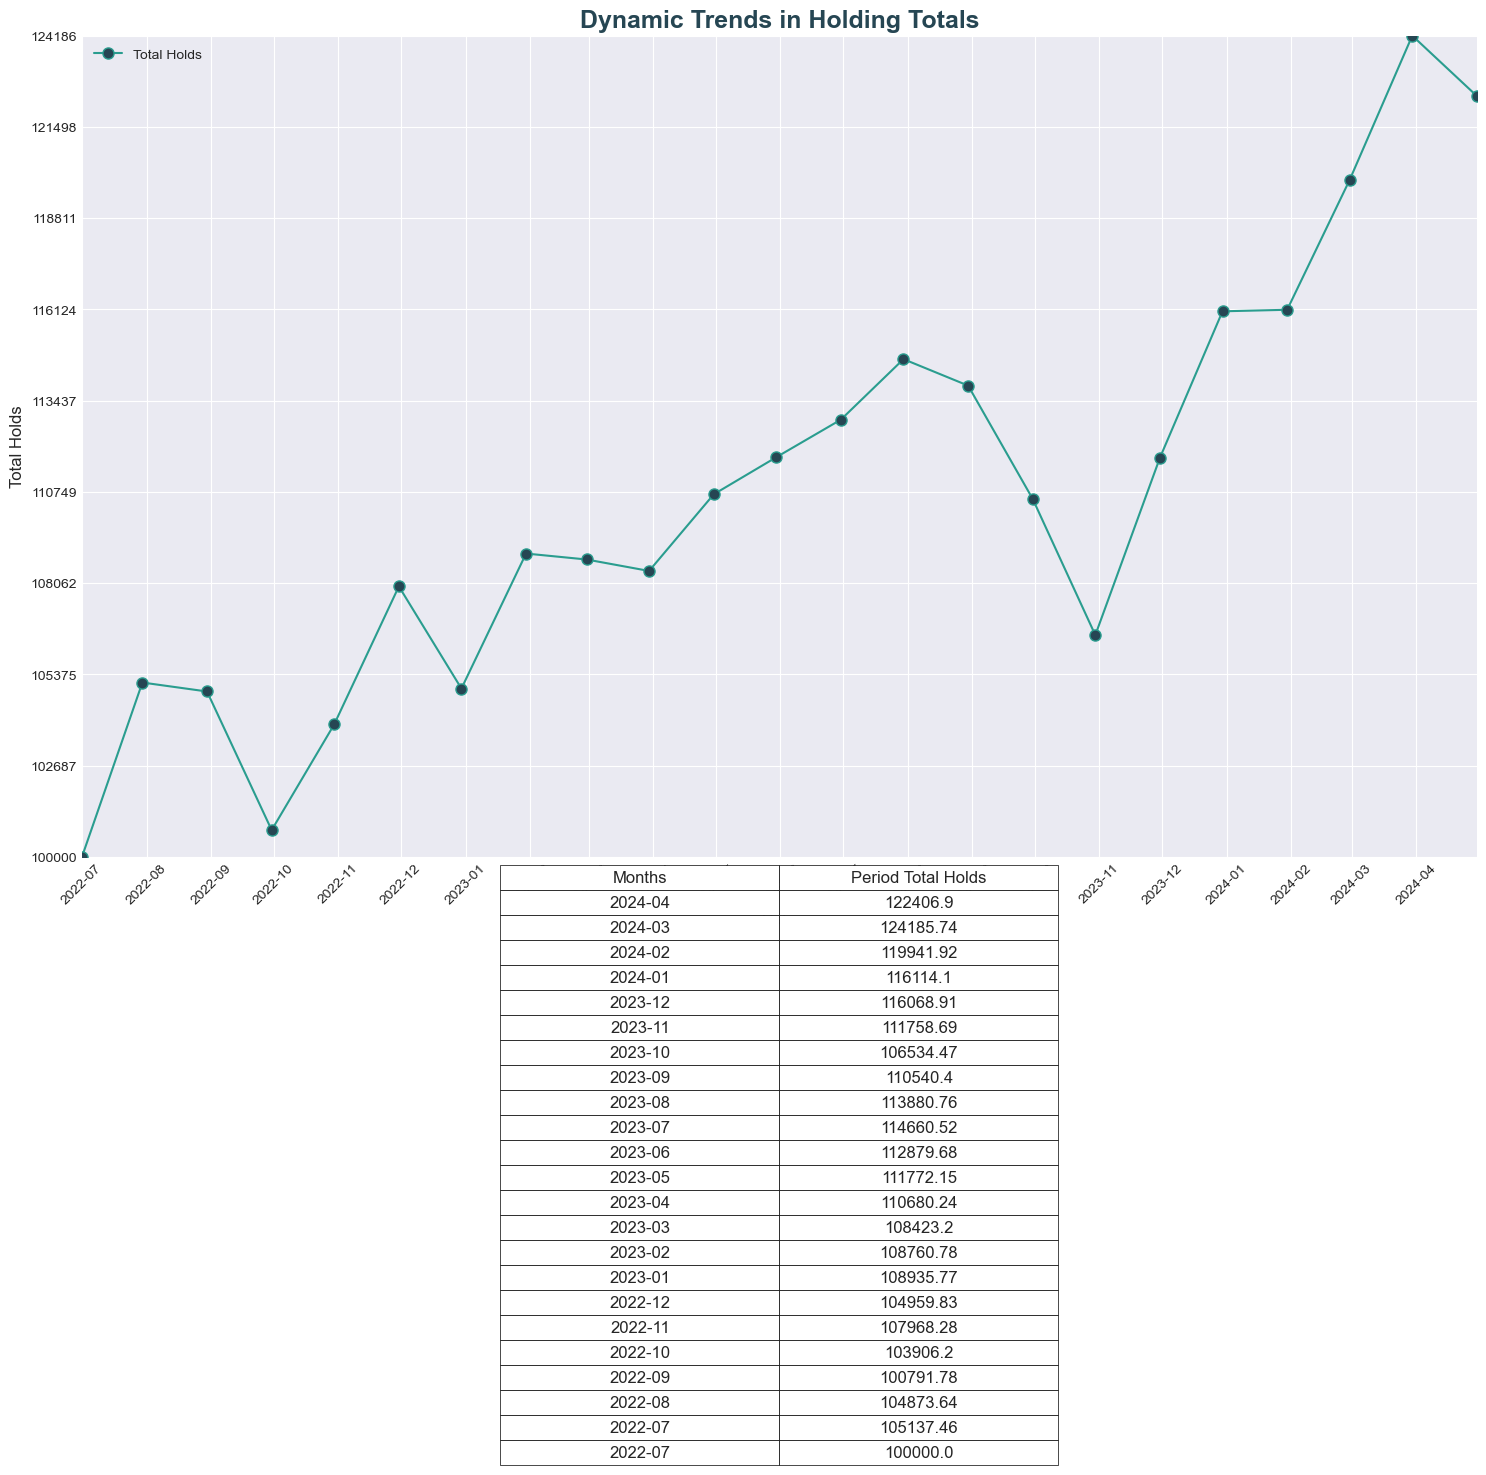

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Define a professional color palette
line_color = '#2a9d8f'  # Teal
marker_color = '#264653'  # Dark blue-grey
table_font_color = '#e9c46a'  # Saffron
horizontal_line_color = '#f4a261'  # Sandy brown, more visible

# Use a professional style
plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.4)

# Plot line graph
ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds',
         color=line_color, marker='o', markerfacecolor=marker_color, markersize=8, linewidth=1.5)
ax1.set_title('Dynamic Trends in Holding Totals', fontsize=18, fontweight='bold', color=marker_color)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend(loc='upper left')

# Formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)  # Rotate date labels for clarity

# Set the x-axis limits to start at the minimum date
ax1.set_xlim([df_1cp['AnalysisEndDate'].min(), df_1cp['AnalysisEndDate'].max()])

# Manual y-axis ticks
y_max = df_1cp['period_total_holds'].max()
y_min = df_1cp['period_total_holds'].min()
ax1.set_ylim([y_min, y_max])  # Set y-axis limits to match the data range
y_ticks = np.linspace(y_min, y_max, num=10)  # Create 10 evenly spaced ticks within the data range
ax1.set_yticks(y_ticks)  # Set the y-axis ticks
ax1.yaxis.grid(True)  # Ensure grid lines are visible and align with the ticks

# Create performance data DataFrame
performance_data = {
    'Months': df_1cp['AnalysisEndDate'].dt.strftime('%Y-%m'),
    'Period Total Holds': df_1cp['period_total_holds'].tolist()
}
performance_df = pd.DataFrame(performance_data)

# Plot table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Modify scale as needed

plt.tight_layout()  # Adjust the layout to make space for all elements
plt.show()


/var/folders/r1/gtmyxpws2836627xn7_9c5380000gn/T/ipykernel_2375/892175027.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # This may help adjust the position and layout automatically


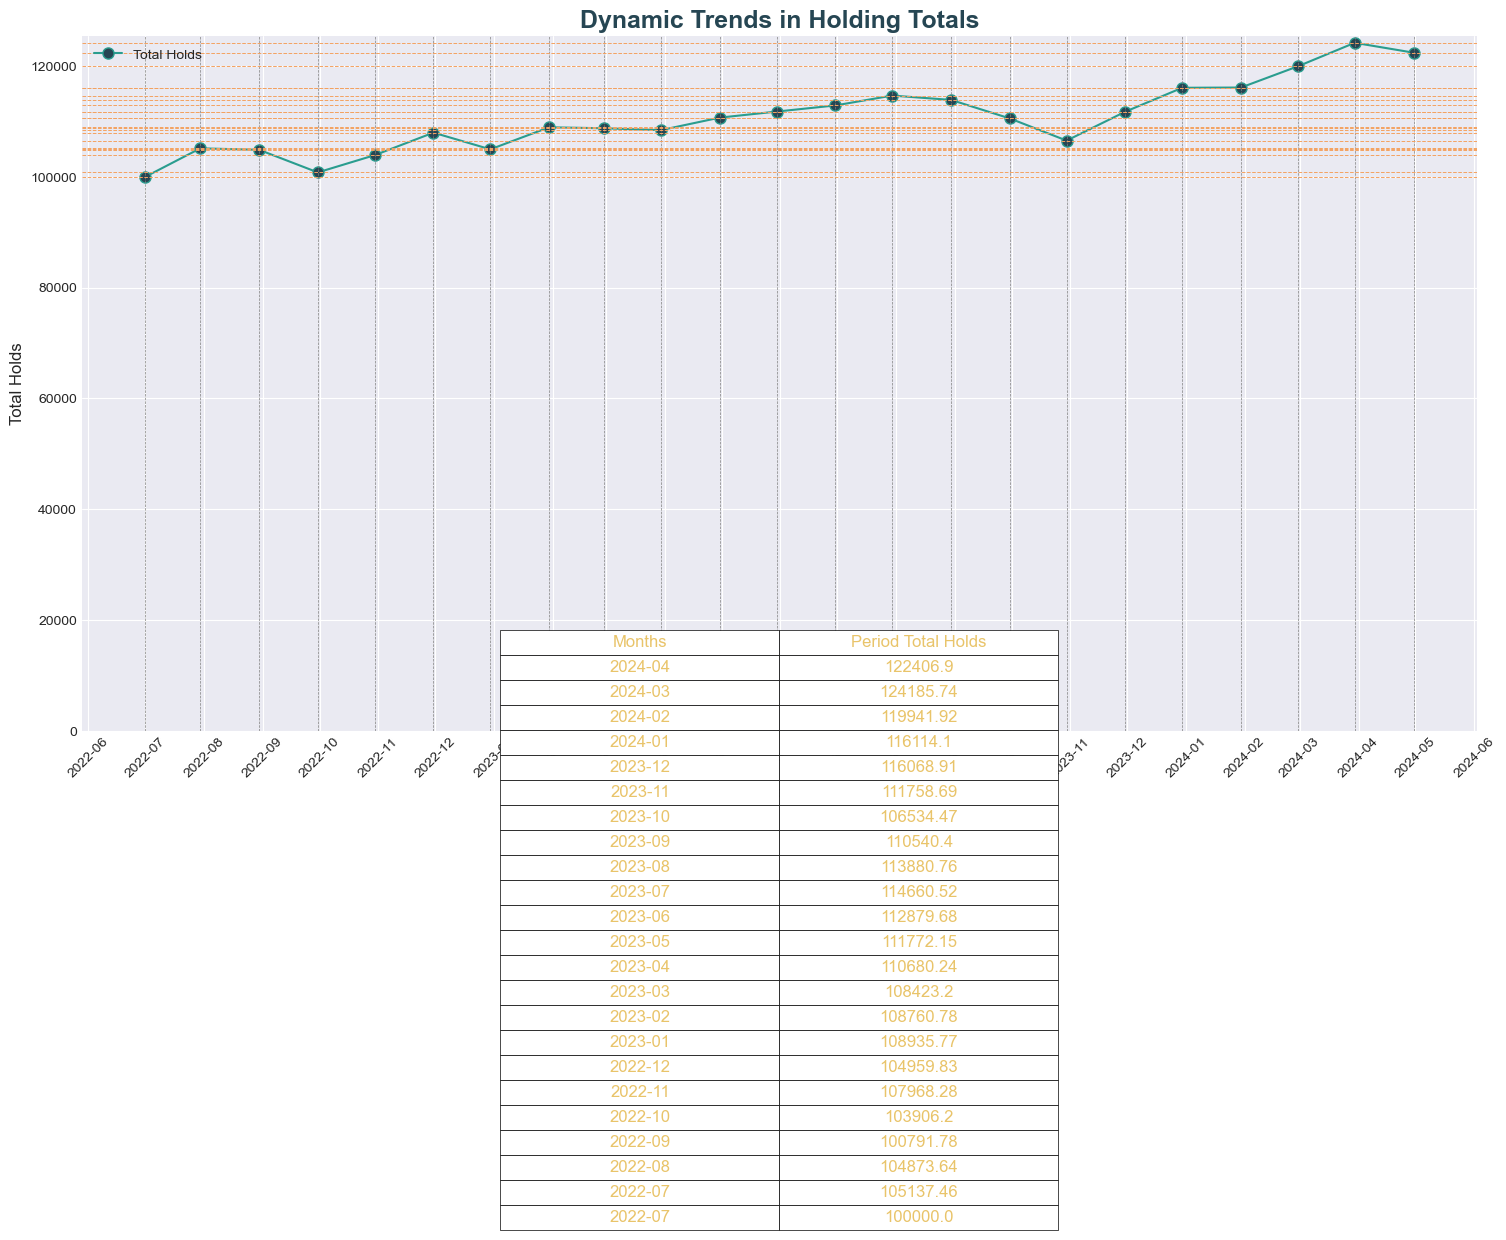

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jim/Jim_outputs/holding_totals_plot.png'

<Figure size 640x480 with 0 Axes>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import numpy as np

# Assuming df_1cp is your DataFrame with the correct data
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Define a professional color palette
line_color = '#2a9d8f'  # Teal
marker_color = '#264653'  # Dark blue-grey
table_font_color = '#e9c46a'  # Saffron
horizontal_line_color = '#f4a261'  # Sandy brown, more visible

# Use a professional style
plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(3, 1, height_ratios=[5, 1, 1], hspace=0.4)  # Adjust the height ratios as needed

# Plot line graph
ax1 = fig.add_subplot(gs[0])
ax1.plot(df_1cp['AnalysisEndDate'], df_1cp['period_total_holds'], label='Total Holds',
         color=line_color, marker='o', markerfacecolor=marker_color, markersize=8, linewidth=1.5)
ax1.set_title('Dynamic Trends in Holding Totals', fontsize=18, fontweight='bold', color=marker_color)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Holds', fontsize=12)
ax1.legend(loc='upper left')

# Set y-axis limits
ax1.set_ylim(bottom=0)  # Adjust this as needed based on your data

# Formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)  # Rotate date labels for clarity

# Adding customizable horizontal and vertical lines
for date in df_1cp['AnalysisEndDate']:
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

for y in np.unique(df_1cp['period_total_holds']):
    ax1.axhline(y=y, color=horizontal_line_color, linestyle='--', linewidth=0.7)  # Thicker and more visible

# Create performance data DataFrame
performance_data = {
    'Months': df_1cp['AnalysisEndDate'].dt.strftime('%Y-%m'),
    'Period Total Holds': df_1cp['period_total_holds'].tolist()
}
performance_df = pd.DataFrame(performance_data)

# Plot table
ax2 = fig.add_subplot(gs[1])
ax2.axis('off')
table = ax2.table(cellText=performance_df.values, colLabels=performance_df.columns, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Modify scale as needed

# Set text properties for color
text_props = table.get_celld()
for cell in text_props:
    text_props[cell].get_text().set_color(table_font_color)

plt.tight_layout()  # This may help adjust the position and layout automatically
plt.show()
output_dir = "/Users/jim/Jim_outputs/"
plt.savefig(f"{output_dir}holding_totals_plot.png", format='png', dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Enhanced_Returns_Graph.png'

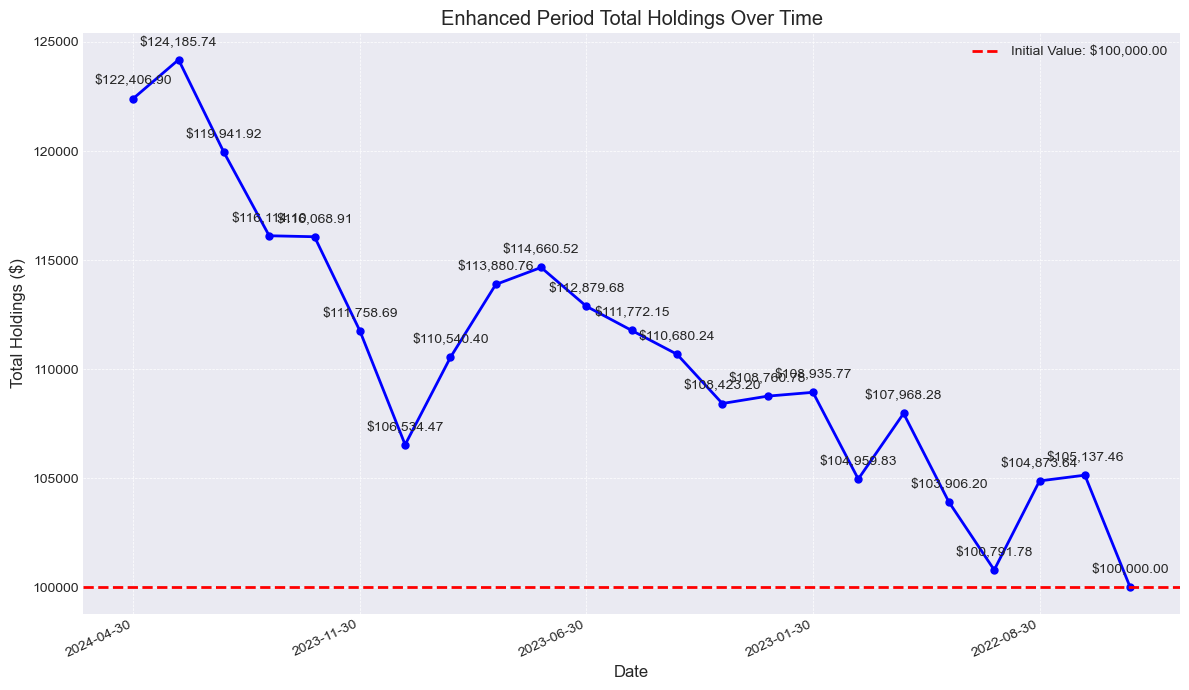

In [86]:
# Enhancing the plot quality and appearance

# Creating a more visually appealing plot
plt.figure(figsize=(12, 7), dpi=100)  # Increased size and resolution for clarity
plt.plot(df['AnalysisEndDate'], df['period_total_holds'], marker='o', markersize=5, linestyle='-', linewidth=2, color='blue')  # Enhancing line and marker aesthetics

# Adding a horizontal line at the initial value with enhanced style
plt.axhline(y=df['period_total_holds'].iloc[-1], color='red', linestyle='--', linewidth=2, label=f'Initial Value: ${df["period_total_holds"].iloc[-1]:,.2f}')

# Adding annotations for better understanding
for idx, row in df.iterrows():
    plt.annotate(f'${row["period_total_holds"]:,.2f}', (row['AnalysisEndDate'], row['period_total_holds']), textcoords="offset points", xytext=(0,10), ha='center')

# Improving the date formatting and layout
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))  # Set major ticks to show every 5 periods
plt.xticks(rotation=25, ha='right')  # Slight rotation for better fit
plt.xlabel('Date')
plt.ylabel('Total Holdings ($)')
plt.title('Enhanced Period Total Holdings Over Time')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('/mnt/data/Enhanced_Returns_Graph.png')
plt.show()
